<a href="https://colab.research.google.com/github/ebudd45/colabnotebooks/blob/main/reanalysis_sounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install needed modules

!pip install sounderpy
!pip install cdsapi

In [2]:
import sounderpy as spy
import cdsapi


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                     v3.0.1 | Feb. 2024 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



In [3]:
#Use is using ERA5 Reanaysis data
uid = 261492
apikey = "d49b15eb-e8f6-44e5-adee-63179d3f018e"

with open("/root/.cdsapirc", "w") as f:
    print("url: https://cds.climate.copernicus.eu/api/v2", file=f)
    print(f"key: {uid}:{apikey}", file=f)

In [4]:
#Reanalysis data

model = 'era5'
latlon = [40.48, -86.20]
year = '1965'
month = '04'
day = '11'
hour = '18'
data = spy.get_model_data(model, latlon, year, month, day, hour, dataset=None, box_avg_size=0.10, hush=False)

> ERA5 REANALYSIS DATA ACCESS FUNCTION --
------------------------------------------
> SOME MESSAGES FROM THE ECMWF CDS...


2024-02-25 20:53:53,407 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-02-25 20:53:53,411 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-02-25 20:53:53,748 INFO Request is completed
INFO:cdsapi:Request is completed
2024-02-25 20:53:53,913 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-02-25 20:53:53,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


> DATASET ACCESSED: reanalysis-era5-pressure-levels


2024-02-25 20:53:54,284 INFO Request is completed
INFO:cdsapi:Request is completed
2024-02-25 20:53:54,287 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/adaptor.mars.internal-1708833531.4801822-15687-8-7241f2b9-df62-44f7-92da-4d29475a01d2.nc to ./output.nc (3.1K)
INFO:cdsapi:Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/adaptor.mars.internal-1708833531.4801822-15687-8-7241f2b9-df62-44f7-92da-4d29475a01d2.nc to ./output.nc (3.1K)


> DATASET ACCESSED: reanalysis-era5-single-levels


2024-02-25 20:53:55,337 INFO Download rate 3K/s
INFO:cdsapi:Download rate 3K/s
2024-02-25 20:53:55,341 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/adaptor.mars.internal-1708836432.6752195-6661-3-e51d5b48-3570-47eb-978c-3342c7cf92ba.nc to ./output.nc (2.7K)
INFO:cdsapi:Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/adaptor.mars.internal-1708836432.6752195-6661-3-e51d5b48-3570-47eb-978c-3342c7cf92ba.nc to ./output.nc (2.7K)
2024-02-25 20:53:56,424 INFO Download rate 2.5K/s
INFO:cdsapi:Download rate 2.5K/s


> ERA5 REANALYSIS DATA PARSE FUNCTION --
------------------------------------------
> COMPLETE --------
> RUNTIME: 00:00:06
> SUMMARY: 18Z ERA5 F00 for [40.48, -86.2] at 04-11-1965-18Z
 
> THERMODYNAMICS --------------------------------------------- 
--- SBCAPE: 10117.6 | MUCAPE: 10117.6 | MLCAPE: 5279.6 | ECAPE: --
--- MU 0-3: 0.0 | MU 0-6: 0.0 | SB 0-3: 0.0 | SB 0-6: 0.0
 
> KINEMATICS ------------------------------------------------- 
--- 0-500 SRW: -- | 0-500 SWV: 0.0 | 0-500 SHEAR: -- | 0-500 SRH: 0.0
--- 1-3km SRW: -- | 1-3km SWV: 0.001 | 1-3km SHEAR: -- | | 1-3km SRH: 12.5
 


In [ ]:
#Modekl data
# Declare a BUFKIT site ID, forecast model, & forecast hour

site_id = 'kmop'
model_name = 'hrrr'
forecast_hour = 6

data = spy.get_bufkit_data(model_name, site_id, forecast_hour)

> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 01Z HRRR F06 for KMOP, MOUNT PLEASANT at 02-25-2024-07Z
 
> THERMODYNAMICS --------------------------------------------- 
--- SBCAPE: 0.0 | MUCAPE: 0.0 | MLCAPE: 0.0 | ECAPE: --
--- MU 0-3: 0.0 | MU 0-6: 0.0 | SB 0-3: 0.0 | SB 0-6: 0.0
 
> KINEMATICS ------------------------------------------------- 
--- 0-500 SRW: 24.6 knot | 0-500 SWV: 0.025 | 0-500 SHEAR: 24.2 | 0-500 SRH: 161.4
--- 1-3km SRW: 17.1 knot | 1-3km SWV: 0.002 | 1-3km SHEAR: 10.8 | | 1-3km SRH: -21.1
 


> SOUNDING PLOTTER FUNCTION --
---------------------------------


> COMPLETE --------
> RUNTIME: 00:00:04


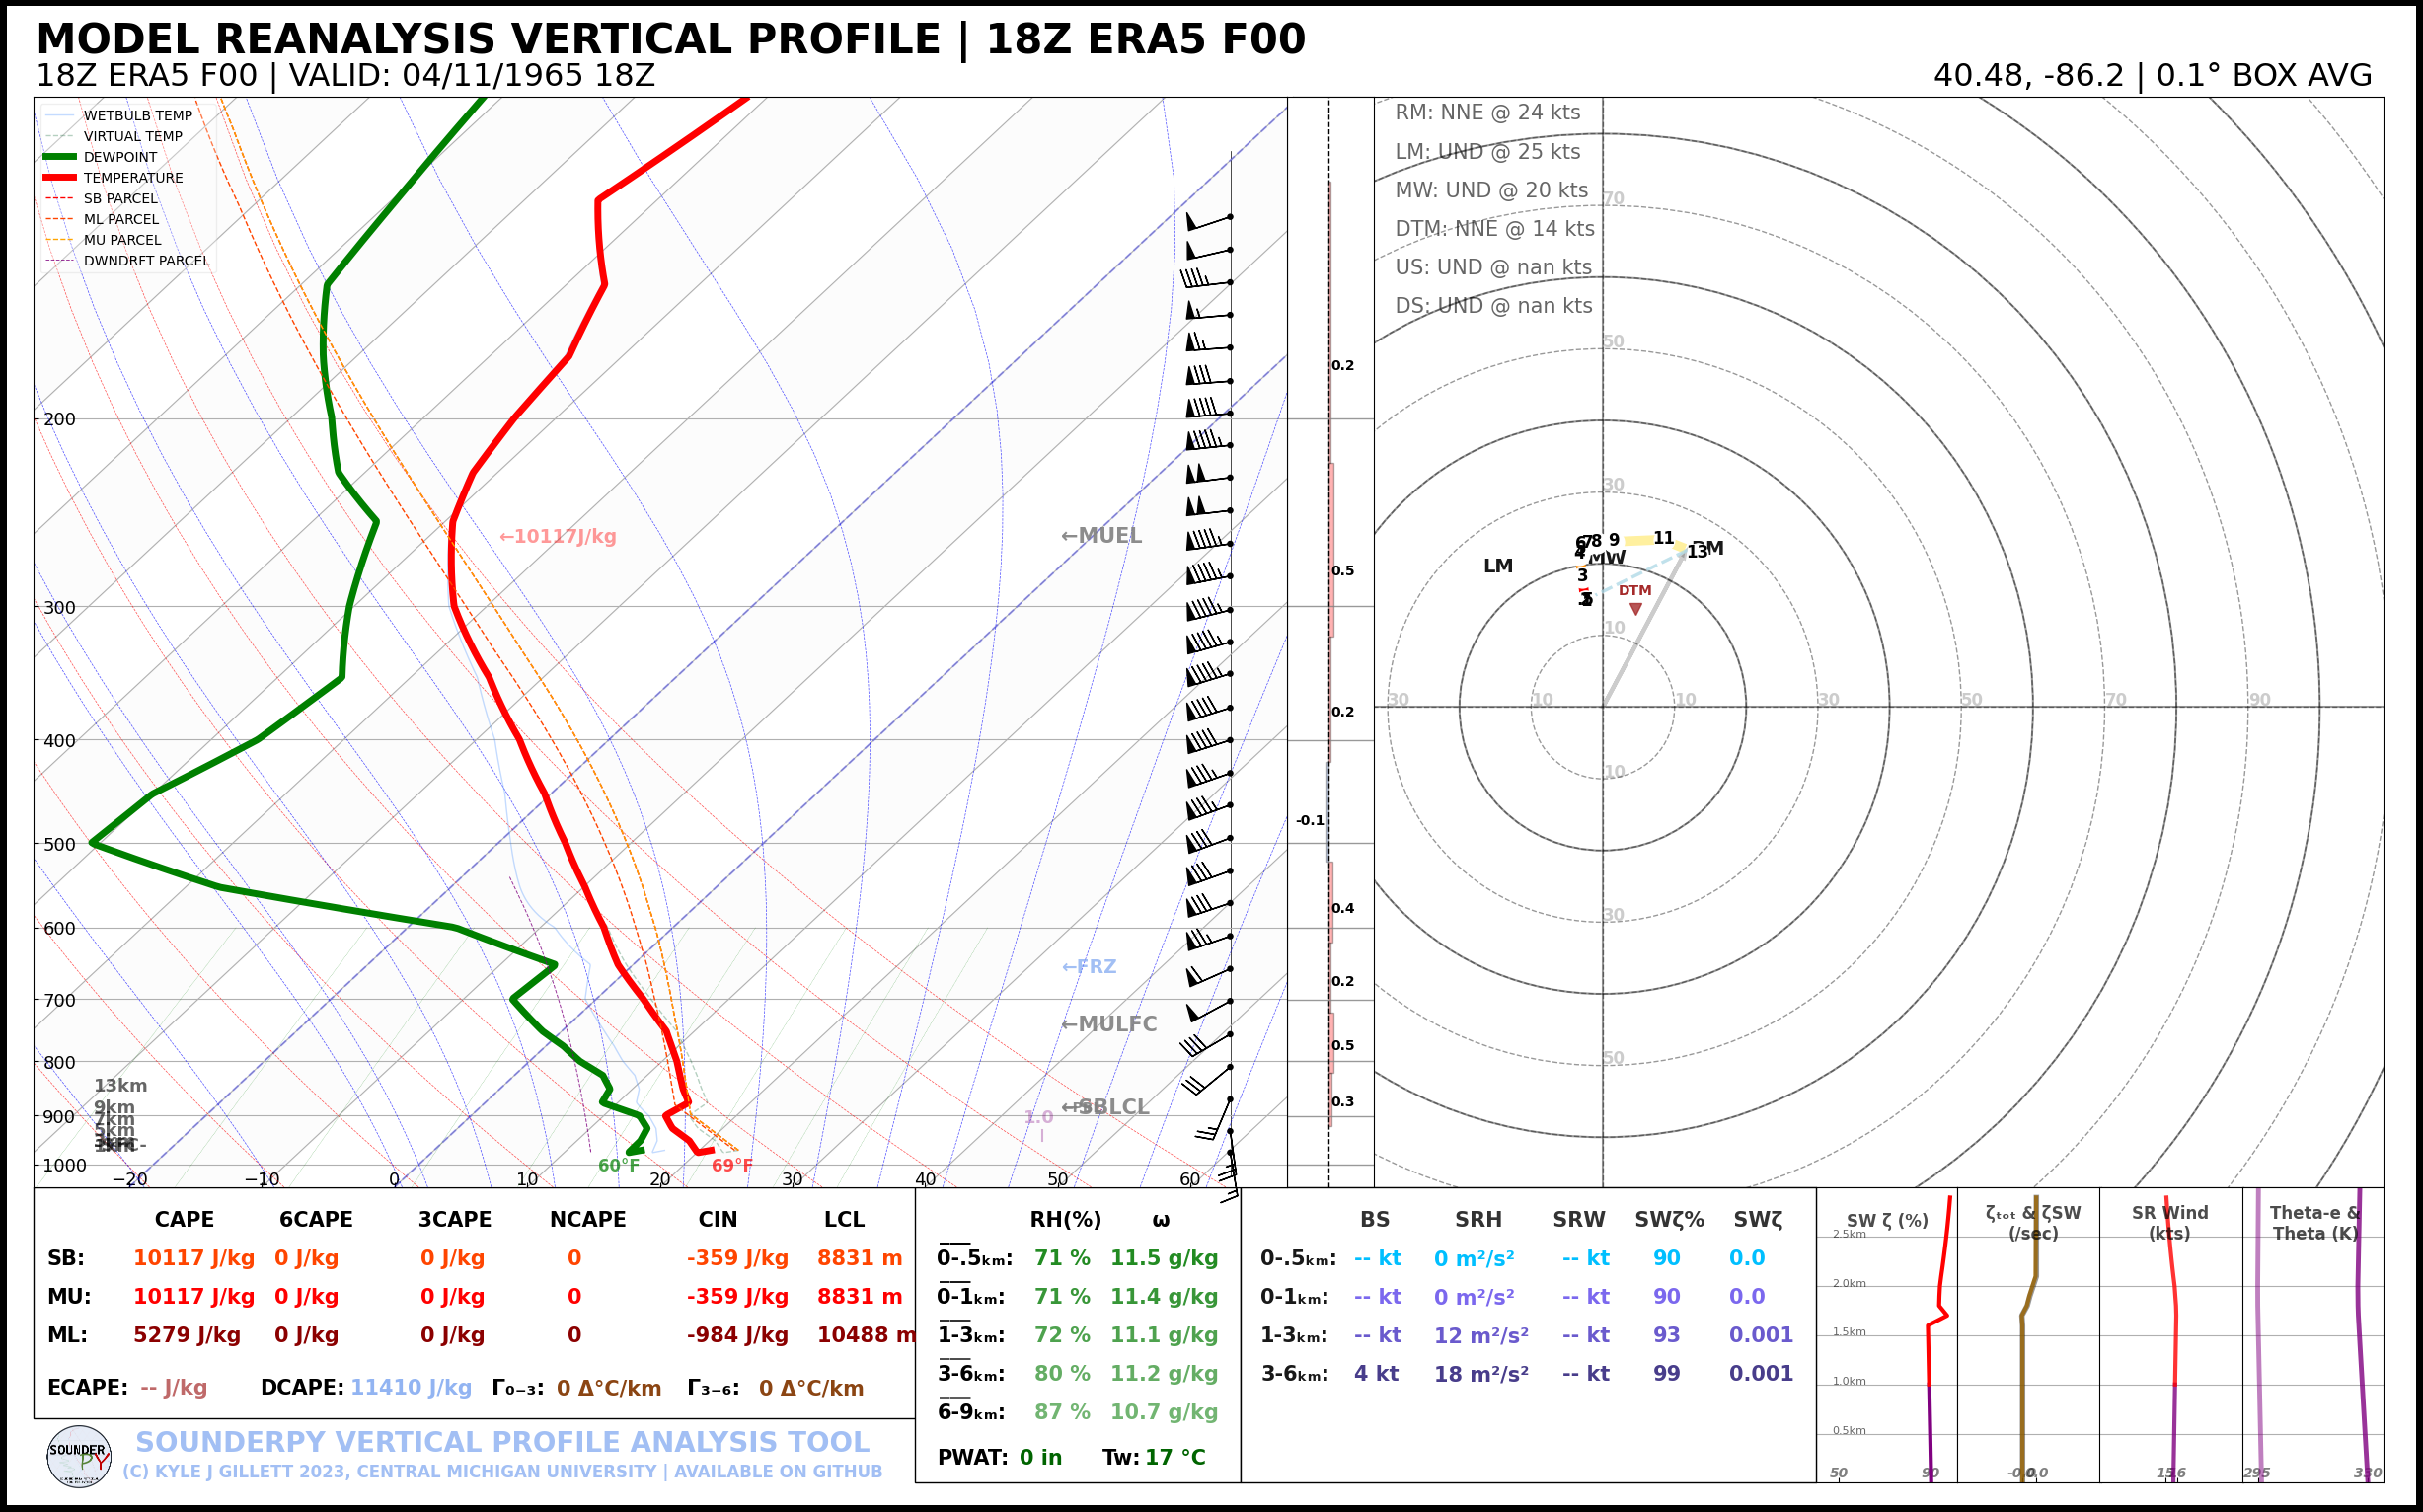

In [5]:
spy.build_sounding(data)